<center> <h1> CSE 574 Project 1 </h1> </center>

<center> <h2> Authors: Mihir Chauhan, Sargur Srihari </h2> </center>

<center> <h2> Due Time and Date: 11:59PM October 7th 2020 </h2> </center>

### Project 1 Task

The task of this project is to perform classification using machine learning for a two class problem. The features used for classification are pre-computed from images of a fine needle aspirate (FNA) ofa breast mass.  Your task is to classify suspected FNA cells to Benign (class 0) or Malignant (class 1) using logistic regression as the classifier. The dataset in use is the Wisconsin Diagnostic Breast Cancer (wdbc.csv).



### Dataset Description

You will be using Wisconsin Diagnostic Breast Cancer (WDBC) dataset for training, validation and testing. The  dataset you are provided with is wdbc.csv  which contains  500  data points with  31  attributes (diagnosis  (B/M),  30  real-valued  inputfeatures). 

####  How are the 30 features computed? (Below info. is just for your knowledge)
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breastmass.  Computed features describes the following characteristics of the cell nuclei present in the image. 

|    |                              Feature                              |
|----|:-----------------------------------------------------------------:|
| 1  | radius (mean of distances from center to points on the perimeter) |
| 2  | texture (standard deviation of gray-scale                         |
| 3  | perimeter                                                         |
| 4  | area                                                              |
| 5  | smoothness (local variation in radius lengths)                    |
| 6  | compactness (perimeter2/area − 1.0)                               |
| 7  | concavity (severity of concave portions of the contour)           |
| 8  | concave points (number of concave portions of the contour)        |
| 9  | symmetry                                                          |
| 10 | fractal dimension (“coastline approximation” - 1)                 |

The mean, standard error, and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in <b>30 features<b>.

### Plan of work

#### STEP 1: Import Libraries

You are NOT ALLOWED to use any libraries for directly implementing Logistic Regression.

For eg. [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <font color='red'>NOT ALLLOWED</font>

You need to implement Logistic Regression from scratch using Gradient Descent Optimization Algorithm. 

You can use libraries for:
* loading data (Pandas, Numpy), <font color='green'>ALLLOWED</font>
* Preprocessing Data (sklearn > preprocessing), <font color='green'>ALLLOWED</font>
* Partitioning Data (sklearns > train_test_split), <font color='green'>ALLLOWED</font>
* Plotting Graphs (Matplotlib) <font color='green'>ALLLOWED</font>
* Finding Accuracy, Precision, Recall using sklearn.metrics <font color='green'>ALLLOWED</font>

You can alternatively use other libraries to implement any sub-task (e.g. loading, partitioning etc.)

In [177]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from numpy import savetxt, loadtxt
%matplotlib inline

#### Step 2: Data Loading <font color='blue'>(5 Points)</font>

1. Read 'wdbc.csv' data using Pandas library. Load the data in a dataframe
2. Drop first row as it is the header row
2. Map Malignant to Class 1 and Benign to Class 0

In [178]:
path_to_file = "data\wdbc.csv"

# extracting data
data = pd.read_csv(path_to_file, encoding='UTF-8',header=None)
def data_preprocessor(data=None):
    # dropping column 1
    data = data.drop([0])

    # get row, column count
    row_count = data.shape[0]
    col_count = data.shape[1]
    print("No. of rows: ",row_count)
    print("No. of columns: ",col_count)
    print("------------------------------------------------------------------------")

    col_names = []
    # col_names = [col_names.append("col_"+str(i+1)) for i in range(col_count)]

    # create list of header names
    for i in range(col_count):
        col_names.append("col_"+str(i+1))
    # print(col_names)

    # update dataset with header names
    data.columns = col_names

    # Map label column to 0 and 1. 
    # 0: B (Benign), 1: M (Malingnant)
    data.col_1 = data.col_1.map({'M':1, 'B':0})

    # split data in train(80%),validate(10%) and test(10%) dataframes
    # get the X,Y where X is training set and Y is target vector.
    X_train, X_other, Y_train, Y_other = train_test_split(data.iloc[:,1:], data.col_1, train_size=0.8, random_state=50)
    X_validate, X_test, Y_validate, Y_test = train_test_split(X_other,Y_other,train_size=0.5,random_state=50)

    return X_train, Y_train, X_validate, Y_validate, X_test, Y_test, data

#### Step 3: Data Partitioning <font color='blue'>(5 Points)</font>

1. Partition your data into training (80%), validation (20%) and testing data(20%) using sklearn library (Hint: use train_test_split)
2. Seperate Target Label (y) and Features (x1 to x30) for training, validation and testing data.

In [179]:
#done in function above

#### Step 4: Scaling Features <font color='blue'>(5 Points)</font>

One simple scaling function that you could use off the shelf is Min Max Scaler function of Sklearns. Min Max scaler function transforms features by scaling each feature to a range between <b> 0 and 1 </b>. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

$X_{std} = \frac{X - X_{min}}{X_{max} - X_{min}}$

$X_{scaled} = X_{std} * (maxRange - minRange) + minRange$

$maxRange$ = 1, <br>
$minRange$ = 0, <br>
$X_{max}$ and $X_{min}$ are over axis = 0 (Each columns max and min value) 

##### Why do we need to scale features?
We scale the data to bring all the features to the same range (in our case between 0 and 1).

#### Hint, make sure the dimensionality of the training features, weights, biases are consistent for np.dot and np.multiply

In [180]:
def print_shape(matrix=None,name=None):
    if type(matrix) is list:
        for m in range(len(matrix)):
            print("Shape of {}:        \t".format(name[m]),matrix[m].shape)
    else:
        print("Shape of {}:        \t".format(name),matrix.shape)
    
    print("------------------------------------------------------------------------")
    
def normalize(X_train=None, Y_train=None, X_validate=None, Y_validate=None, X_test=None, Y_test=None):
    # normalize the feature set
    scaler_obj = StandardScaler()
    scaler_obj.fit(X_train)
    mean_val = scaler_obj.mean_
    # print(mean_val)
    X_train = scaler_obj.transform(X_train)
    X_validate = scaler_obj.transform(X_validate)
    X_test = scaler_obj.transform(X_test)

    # Converting Y into array values (did this to fix Y datas and make them into a vector)
    Y_train = np.array(Y_train)
    Y_validate = np.array(Y_validate)
    Y_test = np.array(Y_test)
        
    # reshaping Y target vectors from (x,) to (x,1)
    Y_train = Y_train.reshape(400,1)
    Y_validate = Y_validate.reshape(50,1)
    Y_test = Y_test.reshape(50,1)
    
    return X_train, Y_train, X_validate, Y_validate, X_test, Y_test

#### Step 5: Initialization of Variables
* Initialize Hyper-Parameters (Learning Rate, Number of Epochs) to some value
* Initialize weights to any random values (We have initialized weights as an array random values sampled from a normal distribution)
* Initialize bias to any scalar value (We have initialized bias to value 0)
* Initialize other variables which may be used for tracking cost, number of data points etc..

In [181]:
def initializer(hp_flag=False):
    # initialize weights with 0
    weights = np.zeros((30,1), dtype=np.int64)
#     print(weights)
#     print(len(weights))

    # initialize bias with 0
    bias = 0

    if hp_flag:
        # set learning rate to 
        learning_rate = [0.1, 0.01, 0.003, 0.005, 0.0001]
    else:
        # set learning rate to 
        learning_rate = 0.003
    
    print("Learning rate(s)", learning_rate)

    return weights, bias, learning_rate

#### Step 6: TRAINING with Logistic Regression Implementation using Gradient Descent Algorithm <font color='blue'>(30 Points)</font>

Iteratively update the weights and biases for each epoch using:
* Step 6.1: Use genesis equation $\hat{y} = \sigma (W.X + b)$ where $W$ is the weight array, $X$ is the input features and $\hat{y}$ is the predicted value which will be between 0 and 1. (You will have to perform same operation on validation set as well)
* Step 6.2: Find Binary Cross Entropy Cost for training and validation set using predicted value $\hat{y}$ and truth value $y$
* Step 6.3: Find $ \Delta W = \frac{\delta L}{\delta W}$ and $ \Delta b = \frac{\delta L}{\delta b}$ (Proof for finding  $ \Delta W$ and $\Delta b$ is available in prof. slides)
* Step 6.4: Update $W$ and $b$ using learning rate as follows:
  - $W = W - learningRate*\Delta W$
  - $b = b - learningRate*\Delta b$
* Step 6.5: Store BCE Cost for training and validation in seperate cost tracking list
* Step 6.6: Calculate Training and Validation Accuracy and store in seperate accuracy tracking list (<b>Hint</b>: Threshold $\hat{y}$ to 0.5 for category determination for finding accuracy)

Run step 6 multiple times, each time with a different set of hyperparameters and determine the best set of hyperparameters which gives best training and validation accuracy. 

Corresponding to the best set of hyper parameters, you should get the best set of weights and bias.

No. of rows:  500
No. of columns:  31
------------------------------------------------------------------------
Data is normalized!
Printing Matrix dimensions of all sets
Shape of X_train:        	 (400, 30)
Shape of Y_train:        	 (400, 1)
Shape of X_validate:        	 (50, 30)
Shape of Y_validate:        	 (50, 1)
Shape of X_test:        	 (50, 30)
Shape of Y_test:        	 (50, 1)
------------------------------------------------------------------------
Learning rate(s) 0.003
Shape of weights:        	 (30, 1)
------------------------------------------------------------------------
------------------------------------------------------------------------

Learning Rate:  0.003
Shape of z:        	 (1, 400)
Shape of activation:        	 (1, 400)
Shape of Y_train:        	 (1, 400)
------------------------------------------------------------------------


Train Loss Value[0]:  	 0.6931471805599452
Shape of z_valid:        	 (1, 50)
Shape of activation_valid:        	 (1, 50)
Shape of 

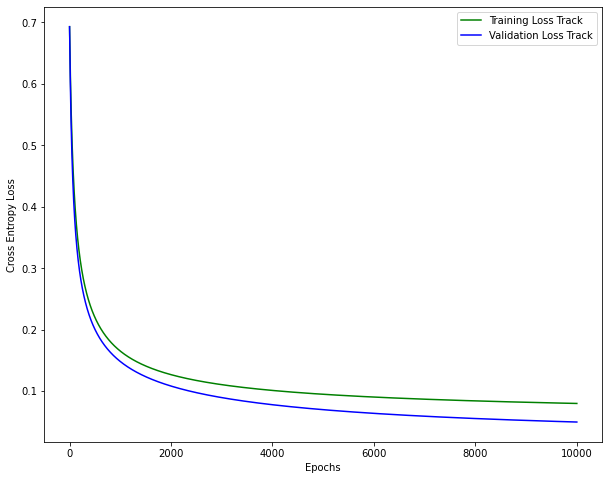

------------------------------------------------------------------------
Training accuracy vs Epochs


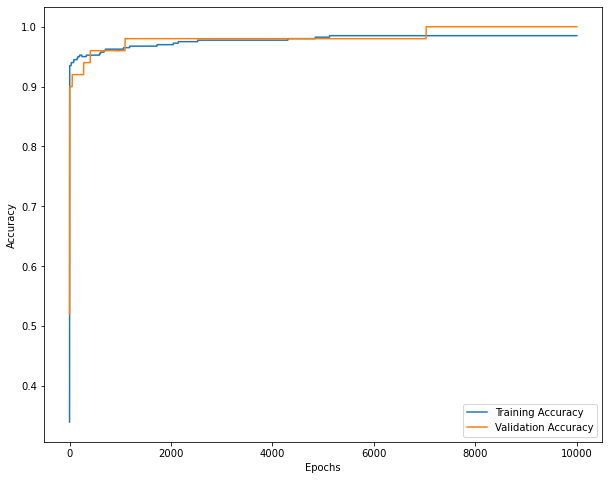

------------------------------------------------------------------------
------------------------------------------------------------------------
weights (30, 1) 	 Bias -0.6703711082942775
Training Accuracy: 98.50%
Training Precision: 99.24%
Training Recall: 96.32%
Validation Accuracy: 100.00%
Validation Precision: 100.00%
Validation Recall: 100.00%
Shape of z_test:        	 (1, 50)
Shape of activation_test:        	 (1, 50)
Shape of Y_test:        	 (1, 50)
------------------------------------------------------------------------
Test Accuracy: 98.00%
Test Precision: 100.00%
Test Recall: 95.24%


In [182]:
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

# function to calculate cross entropy
def cross_entropy_function(y,a):
    numerator = np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    denominator = -y.shape[1]
    loss = numerator/denominator
    return loss

# function to calculate dw weights
def calculate_dw(X,Y,a):
    # print("Before calculating derivative of loss function w.r.t weights")
    # print_shape(matrix=[X,Y,a], name=['X_train','Y','a'])
    dw = np.dot(Y-a,X)/-Y.shape[1]
    # print_shape(matrix=dw,name='dw')
    return dw

# function to calculate db bias
def calculate_db(Y,a):
    # print("Before calculating derivative of loss function w.r.t bias")
    # print_shape(matrix=[Y,a], name=['Y','a'])
    db = np.sum(Y-a)/-Y.shape[1]
    return db

# function to classify activation
def classify_activation(a):
    return [1 if i >= 0.5 else 0 for i in a[0]]


# In[1]:


"""
To produce the graph of Loss vs Epoch for different hyperparameters,
set hp_flag (hyperparameter flag) to 'True'.
Default value of hp_flag is False. Flag is initialized in the last cell of jupyter notebook.
"""

# function to perform logistic regression for different hyperparameters
def hyperparameter(X_train=None, Y_train=None, weights=None,bias=None,learning_rate=None):
    
    # loss tracker
    all_losses = []
    
    # dictionary to store data
    regression_values = {}
    
    for i, rates in enumerate(learning_rate):
        # counter
        count = 0
    
        losses = []
        
        # re-initializing weights and bias to 0, since iterating over new learning rate
        weights = np.zeros((30,1), dtype=np.int64)
        bias = 0
        
        print("------------------------------------------------------------------------")
        print("\nLearning Rate: ", rates)
        
        # beginning epoch loop
        for epoch in range(10000):

            """
            Performing forward pass for Training data.
            Here we calculate:
            X_train: The training set with 455 samples and 30 feature set
            Y_train: The target vector with 455 targets
            z: 
            activation: The activation or the prediction
            losses: The loss tracker for training data. This is a list.
            weights: 
            bias: 
            """
            # using the genesis function z=mx+c for training data
            z = np.dot(np.transpose(weights),np.transpose(X_train)) + bias

            # calculating activation/prediction for training data
            activation = sigmoid_function(z)

            # changing the shape of Y_train from (455,1) to (1,455) for ease of calculation
            Y_train = Y_train.reshape(1,400)

            # printing shape of z, activation and Y_train only once
            if count == 0:
                print_shape(matrix=[z,activation,Y_train],name=['z','activation','Y_train'])

            # classify activation in 0 and 1 for training data
            """
            if activation >= 0.5, classify 1
            if activation < 0.5, classify 0
            """  


            # calculate cross entropy and keep track of loss for training data
            losses.append(cross_entropy_function(Y_train,activation))

            # printing value of loss for every 1000 epochs
            if epoch%1000 == 0:
                print("\n\nTrain Loss Value[{}]:  \t".format(epoch), losses[count])

            # increasing counter value after performing forward pass for training
            count = count + 1

            """
            Performing backward pass for Training data.
            Here we calculate:
            weights: 
            bias: 
            """

            # update weightss and bias for training data
            weights = np.transpose(weights) - rates * calculate_dw(X_train,Y_train,activation)
            bias = bias - rates * calculate_db(Y_train,activation)

            # reshaping weights since weights transpose is used during calculation of z
            weights = weights.reshape(30,1)
            #break
        all_losses.append(losses)
    
    plt.figure(figsize= (10,8))
    for x,val in enumerate(all_losses):
        plt.plot(np.arange(len(all_losses[x])), all_losses[x], label='Training Loss Track')
    plt.legend(learning_rate, loc='upper right')
    print("------------------------------------------------------------------------")
    print("Cross Entropy Loss vs Epochs")
    plt.ylabel('Cross Entropy Loss')
    plt.xlabel('Epochs')
    plt.show()
    
    # update dictionary with required values
    regression_values.update({'weights':weights, 'bias':bias})
    
    return regression_values


# In[2]:


# function to perform logistic regression
def logistic_regression(X_train=None, Y_train=None, X_validate=None, Y_validate=None, X_test=None, 
                        Y_test=None, weights=None,bias=None,learning_rate=None):
    # counter
    count = 0
    
    # loss tracker
    losses = []
    vlosses = []
    
    # decision boundary
    training_accuracy = []
    validation_accuracy = []
    
    # dictionary to store data
    regression_values = {}
    
    print("------------------------------------------------------------------------")
    print("\nLearning Rate: ", learning_rate)
    
    # beginning epoch loop
    for epoch in range(10000):
        
        """
        Performing forward pass for Training data.
        Here we calculate:
        X_train: The training set with 455 samples and 30 feature set
        Y_train: The target vector with 455 targets
        z: 
        activation: The activation or the prediction
        losses: The loss tracker for training data. This is a list.
        weights: 
        bias: 
        
        """
        # using the genesis function z=mx+c for training data
        z = np.dot(np.transpose(weights),np.transpose(X_train)) + bias
        
        # calculating activation/prediction for training data
        activation = sigmoid_function(z)
        
        # changing the shape of Y_train from (455,1) to (1,455) for ease of calculation
        Y_train = Y_train.reshape(1,400)

        # printing shape of z, activation and Y_train only once
        if count == 0:
            print_shape(matrix=[z,activation,Y_train],name=['z','activation','Y_train'])
            
        # classify activation in 0 and 1 for training data
        """
        if activation >= 0.5, classify 1
        if activation < 0.5, classify 0
        """  
        # calculating training data accuracy
        training_accuracy.append(accuracy_score(Y_train[0],classify_activation(activation)))

        
        # calculate cross entropy and keep track of loss for training data
        losses.append(cross_entropy_function(Y_train,activation))
        
        # printing value of loss for every 1000 epochs
        if epoch%1000 == 0:
            print("\n\nTrain Loss Value[{}]:  \t".format(epoch), losses[count])
        
        """
        Performing forward pass for Validation data.
        Here we calculate:
        X_validation: The validation set with 57 samples and 30 feature set
        Y_validation: The target vector with 57 targets
        z_valid: 
        activation_valid: The activation or the prediction
        vlosses: The loss tracker for validation data. This is a list.
        vweights: 
        vbias: 
        
        """
            
        # using the genesis function z=mx+c for validation data
        z_valid = np.dot(np.transpose(weights),np.transpose(X_validate)) + bias
        
        # calculating activation/prediction for validation data
        activation_valid = sigmoid_function(z_valid)
        
        # changing the shape of Y_validate from (455,1) to (1,455) for ease of calculation
        Y_validate = Y_validate.reshape(1,50)
        
        
        # printing shape of z_valid, activation_valid and Y_validate only once
        if count == 0:
            print_shape(matrix=[z_valid,activation_valid,Y_validate],name=['z_valid','activation_valid','Y_validate'])
        
        # classify activation in 0 and 1 for validation data
        """
        if activation >= 0.5, classify 1
        if activation < 0.5, classify 0
        """        
        # calculating validation data accuracy
        validation_accuracy.append(accuracy_score(Y_validate[0],classify_activation(activation_valid)))

        
        # calculate cross entropy and keep track of loss for validation data
        vlosses.append(cross_entropy_function(Y_validate,activation_valid))
        
        # printing value of loss for every 1000 epochs
        if epoch%1000 == 0:
            print("Validate Loss Value[{}]:  \t".format(epoch), vlosses[count])
        
        # increasing counter value after performing forward pass for both training and validation data
        count = count + 1
        
        """
        Performing backward pass for Training data.
        Here we calculate:
        weights: 
        bias: 
        
        """

        # update weightss and bias for training data
        weights = np.transpose(weights) - learning_rate * calculate_dw(X_train,Y_train,activation)
        bias = bias - learning_rate * calculate_db(Y_train,activation)
        
        # reshaping weights since weights transpose is used during calculation of z
        weights = weights.reshape(30,1)
        #break
    
    # calculate precision and recall for training data
    training_precision = precision_score(Y_train[0],classify_activation(activation))
    training_recall = recall_score(Y_train[0],classify_activation(activation))

    
    # calculate precision and recall for validation data
    validation_precision = precision_score(Y_validate[0],classify_activation(activation_valid))
    validation_recall = recall_score(Y_validate[0],classify_activation(activation_valid))
   
    
    plt.figure(figsize= (10,8))
    plt.plot(losses, '-g', label='Training Loss Track')
    plt.plot(vlosses, '-b', label='Validation Loss Track')
    plt.legend(loc='upper right')
    print("------------------------------------------------------------------------")
    print("Cross Entropy Loss vs Epochs")
    plt.ylabel('Cross Entropy Loss')
    plt.xlabel('Epochs')
    plt.show()
    print("------------------------------------------------------------------------")
    print("Training accuracy vs Epochs")
    plt.figure(figsize= (10,8))
    plt.plot(training_accuracy, label='Training Accuracy')
    plt.plot(validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.show()
    
    # update dictionary with required values
    
    regression_values.update({'weights':weights, 'bias':bias, 'training_accuracy': training_accuracy, 
                              'training_precision': training_precision, 'training_recall': training_recall, 
                              'validation_accuracy': validation_accuracy, 'validation_precision': validation_precision, 
                              'validation_recall': validation_recall})
    
    return regression_values


# In[3]:


# function to test model based on testing data
def test_model(weights=None,bias=None,X_test=None,Y_test=None):
    
    # using the genesis function z=mx+c for testing data
    z_test = np.dot(np.transpose(weights),np.transpose(X_test)) + bias

    # calculating activation/prediction for testing data
    activation_test = sigmoid_function(z_test)
    
    # changing the shape of Y_test from (57,1) to (1,57) for ease of calculation
    Y_test = Y_test.reshape(1,50)
    
    # printing shape of z_test, activation_test and Y_test
    print_shape(matrix=[z_test,activation_test,Y_test],name=['z_test','activation_test','Y_test'])
    
    # calculating testing data accuracy, precision and recall
    testing_accuracy = accuracy_score(Y_test[0],classify_activation(activation_test))
    testing_precision = precision_score(Y_test[0],classify_activation(activation_test))
    testing_recall = recall_score(Y_test[0],classify_activation(activation_test))
    
    return testing_accuracy, testing_precision, testing_recall


# In[24]:


# set hyperparameter flag to True to view loss against hyperparameters, else default value is False.
hp_flag = False

# calling data_preprocessor function
X_train, Y_train, X_validate, Y_validate, X_test, Y_test, data = data_preprocessor(data=data)

# calling normalize function
X_train, Y_train, X_validate, Y_validate, X_test, Y_test, = normalize(X_train=X_train, Y_train=Y_train, X_validate=X_validate, 
                                                                      Y_validate=Y_validate, X_test=X_test, Y_test=Y_test)
print("Data is normalized!")
print("Printing Matrix dimensions of all sets")
print_shape(matrix=[X_train, Y_train, X_validate, Y_validate, X_test, Y_test],
            name=['X_train','Y_train','X_validate','Y_validate','X_test','Y_test'])

# calling initializer function
weights, bias, learning_rate = initializer(hp_flag=hp_flag)
print_shape(matrix=weights,name='weights')

if hp_flag:
    # calling hyperparameter function
    regression_values = hyperparameter(X_train=X_train, Y_train=Y_train, weights=weights, bias=bias, 
                                           learning_rate=learning_rate)
else:
    # calling logistic_regression function
    regression_values = logistic_regression(X_train=X_train, Y_train=Y_train, X_validate=X_validate,
                                        Y_validate=Y_validate, X_test=X_test, Y_test=Y_test, weights=weights,
                                        bias=bias,learning_rate=learning_rate)

    print("------------------------------------------------------------------------")
    print("------------------------------------------------------------------------")
    print("weights {0} \t Bias {1}".format(regression_values['weights'].shape,regression_values['bias']))
    print("Training Accuracy: {:0.2f}%".format(regression_values['training_accuracy'][-1]*100))
    print("Training Precision: {:0.2f}%".format(regression_values['training_precision']*100))
    print("Training Recall: {:0.2f}%".format(regression_values['training_recall']*100))
    print("Validation Accuracy: {:0.2f}%".format(regression_values['validation_accuracy'][-1]*100))
    print("Validation Precision: {:0.2f}%".format(regression_values['validation_precision']*100))
    print("Validation Recall: {:0.2f}%".format(regression_values['validation_recall']*100))

    # calling test model function
    accuracy, precision, recall = test_model(weights=regression_values['weights'],bias=regression_values['bias'],X_test=X_test,Y_test=Y_test)
    print("Test Accuracy: {:0.2f}%".format(accuracy*100))
    print("Test Precision: {:0.2f}%".format(precision*100))
    print("Test Recall: {:0.2f}%".format(recall*100))
    weights=regression_values['weights']
    bias=regression_values['bias']

After performing all the steps above, the best set of updated weights and bias should be stored as a <i>weights_biases.csv</i> file. Your <i>weights_biases.csv</i> will tested on a hidden test set and you would be graded on how well your model (weights) performed on this hidden set <font color='blue'>(30 Points)</font>

<b>(Do not change the code provided in the cell below for storing the weights and bias)</b>

In [183]:
# Save the weights file (DO NOT CHANGE THIS CODE)
weights_bias = np.append(weights,bias)

if weights_bias.shape == (31,):
    print("Weights and Bias consistent :) ")

    savetxt('weights_bias.csv', weights_bias, delimiter=',')
else:
    print("Weights and Bias inconsistent :( ")

Weights and Bias consistent :) 


#### Step 7: Plot Training and Validation Cost vs Number of Epochs <font color='blue'>(5 Points)</font>

In [ ]:
#done in step 6

####  Step 8: Plot Training and Validation Accuracy vs Number of Epochs <font color='blue'>(5 Points)</font>

In [157]:
#done in step 6 

Shape of z_test:        	 (1, 50)
Shape of activation_test:        	 (1, 50)
Shape of Y_test:        	 (1, 50)
------------------------------------------------------------------------
Test Accuracy: 98.00%
Test Precision: 100.00%
Test Recall: 95.24%


#### Step 9: Test your model using tesing data <font color='blue'>(15 Points)</font>

* Step 9.1: Use genesis equation $\hat{y} = \sigma (W.X_{test} + b)$ where $W$ is the weight array, $X_{test}$ is the input test features and $\hat{y}$ is the predicted value which will be between 0 and 1.
* Step 9.2: Threshold $\hat{y}$ at 0.5 to find the category for each data point.
* Step 9.3: Find accuracy, precision and recall for testing data (you can use sklearns.metrics library)

In [184]:
accuracy, precision, recall = test_model(weights=regression_values['weights'],bias=regression_values['bias'],X_test=X_test,Y_test=Y_test)
print("Test Accuracy: {:0.2f}%".format(accuracy*100))
print("Test Precision: {:0.2f}%".format(precision*100))
print("Test Recall: {:0.2f}%".format(recall*100))

Shape of z_test:        	 (1, 50)
Shape of activation_test:        	 (1, 50)
Shape of Y_test:        	 (1, 50)
------------------------------------------------------------------------
Test Accuracy: 98.00%
Test Precision: 100.00%
Test Recall: 95.24%


#### Step 10: Submission to timberlake server

* The code for your implementation should be in this Python notebook with necessary comments within the code.

* Your <b> Python Code file </b> `main.ipynb`, <b> Data File </b> `wdbc.csv` and your <b>Trained Weights and Bias File</b> `weights_bias.csv`</b> should be put in a single folder named as `proj1code`. 

* `proj1code` folder should be zipped with the resulting zip file name as `proj1code.zip`.

* Submit the Python code on CSE timberlake server with the following script:

 - `submit_cse474 proj1code.zip` for undergraduates
 - `submit_cse574 proj1code.zip` for graduates

### Grading Rubric
* <b>30 Points:</b> Your trained `weights_bias.csv` will be automatically graded using a script on unbiased hidden test data file. Hence, it is important that your `weights_biases` should of dimensionality (31,) and properly trained.
* <b>30 Points:</b> Training logic for implementing logistic regression (Step 6)
* <b>15 Points:</b> Testing Accuracy, Precision and Recall (Step 9)
* <b>5 Points:</b> Plot of Training and Validation cost vs No. of epochs (Step 7) 
* <b>5 Points:</b> Plot of Training and Validation accuracy vs No. of epochs (Step 8)
* <b> 5 points: </b> Scaling features (Step 4)
* <b> 5 points: </b> Partitioning Data (Step 3)
* <b> 5 points: </b> Data loading (Step 2)